## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from apex_ocr_server.config import DATABASE_YML_FILE
from apex_ocr_server.database.api import ApexDatabaseApi
from apex_ocr_server.database.models import (
    Clan,
    MatchResult,
    Player,
    PlayerMatchResult,
    Season,
)
from sqlalchemy import func

In [2]:
%matplotlib ipympl

## Database Connection

In [3]:
db_conn = ApexDatabaseApi(config=DATABASE_YML_FILE)
session = db_conn.session

## Query Match Results

In [4]:
match_results = session.query(MatchResult).all()
player_match_results = session.query(PlayerMatchResult).all()
ccc_players = session.query(Clan).filter(Clan.tag == "ccc").first().players

In [6]:
ccc_pmr_df = pd.DataFrame()

for pmr in PlayerMatchResult.get_by_clan_tag(session, "ccc"):
    ccc_pmr_df = pd.concat(
        [ccc_pmr_df, pd.DataFrame(pmr.to_dict(), index=[0])], ignore_index=True
    )

ccc_pmr_df.sort_values(by="datetime", inplace=True)

ccc_pmr_dict = {}
for player in ccc_players:
    ccc_pmr_dict[player.name] = ccc_pmr_df[ccc_pmr_df["player_id"] == player.id].copy()
    ccc_pmr_dict[player.name]["kills_cumsum"] = ccc_pmr_dict[player.name]["kills"].cumsum()
    ccc_pmr_dict[player.name]["assists_cumsum"] = ccc_pmr_dict[player.name]["assists"].cumsum()
    ccc_pmr_dict[player.name]["knockdowns_cumsum"] = ccc_pmr_dict[player.name]["knockdowns"].cumsum()
    ccc_pmr_dict[player.name]["damage_cumsum"] = ccc_pmr_dict[player.name]["damage"].cumsum()
    ccc_pmr_dict[player.name]["revives_cumsum"] = ccc_pmr_dict[player.name]["revives"].cumsum()
    ccc_pmr_dict[player.name]["respawns_cumsum"] = ccc_pmr_dict[player.name]["respawns"].cumsum()

ccc_pmr_df.head()

,id,match_id,season,datetime,match_type,place,result,hash,player_id,clan_id,player_name,legend,kills,assists,knockdowns,damage,survival_time,revives,respawns
0,1,1,11,2021-12-11 17:14:03-05:00,MatchType.BATTLE_ROYALE,2,None,ab6136ded33088a99cf352123193fdee533a2e370dd3a5...,1,1,4ransom,None,2,3,2,883,620,0,0
1,2,1,11,2021-12-11 17:14:03-05:00,MatchType.BATTLE_ROYALE,2,None,ab6136ded33088a99cf352123193fdee533a2e370dd3a5...,2,1,prodigalninja,None,4,2,4,604,601,0,0
2,3,1,11,2021-12-11 17:14:03-05:00,MatchType.BATTLE_ROYALE,2,None,ab6136ded33088a99cf352123193fdee533a2e370dd3a5...,3,1,redlezar,None,3,2,3,1326,599,0,0
3,4,2,11,2021-12-11 17:25:52-05:00,MatchType.BATTLE_ROYALE,2,None,72e9f80d0841432991fbb4f1d61afc5539398851439857...,3,1,redlezar,None,2,0,2,259,589,0,0
4,5,2,11,2021-12-11 17:25:52-05:00,MatchType.BATTLE_ROYALE,2,None,72e9f80d0841432991fbb4f1d61afc5539398851439857...,2,1,prodigalninja,None,3,0,3,859,533,0,0


In [7]:
game_count = {}
for player in ccc_players:
    game_count[player.name] = len(ccc_pmr_dict[player.name])
game_count

{'4ransom': 69, 'prodigalninja': 850, 'redlezar': 1273}

## Plots

<Axes: title={'center': 'Cumulative Respawns'}, ylabel='respawns_cumsum'>

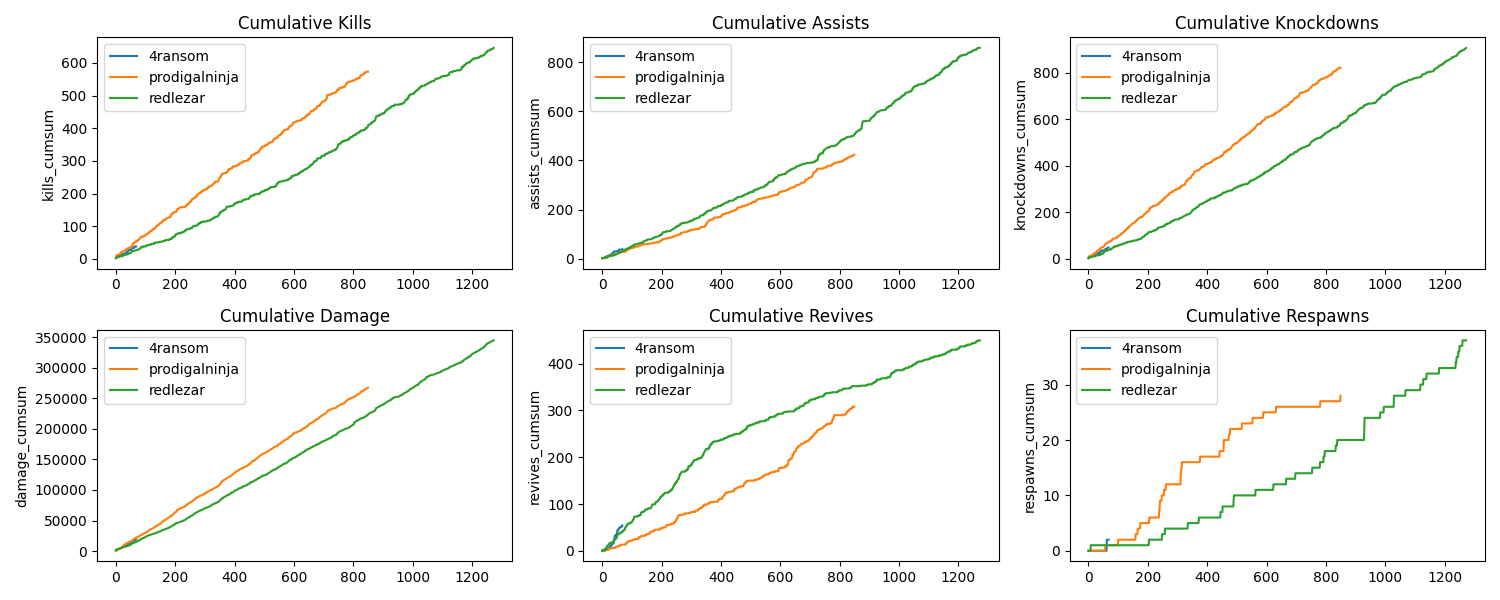

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(15, 6), tight_layout=True)

# Kills
axs[0][0].set_title("Cumulative Kills")
sns.lineplot(x=range(game_count["4ransom"]), y="kills_cumsum", data=ccc_pmr_dict["4ransom"], label="4ransom", ax=axs[0][0])
sns.lineplot(x=range(game_count["prodigalninja"]), y="kills_cumsum", data=ccc_pmr_dict["prodigalninja"], label="prodigalninja", ax=axs[0][0])
sns.lineplot(x=range(game_count["redlezar"]), y="kills_cumsum", data=ccc_pmr_dict["redlezar"], label="redlezar", ax=axs[0][0])

# Assists
axs[0][1].set_title("Cumulative Assists")
sns.lineplot(x=range(game_count["4ransom"]), y="assists_cumsum", data=ccc_pmr_dict["4ransom"], label="4ransom", ax=axs[0][1])
sns.lineplot(x=range(game_count["prodigalninja"]), y="assists_cumsum", data=ccc_pmr_dict["prodigalninja"], label="prodigalninja", ax=axs[0][1])
sns.lineplot(x=range(game_count["redlezar"]), y="assists_cumsum", data=ccc_pmr_dict["redlezar"], label="redlezar", ax=axs[0][1])

# Knockdowns
axs[0][2].set_title("Cumulative Knockdowns")
sns.lineplot(x=range(game_count["4ransom"]), y="knockdowns_cumsum", data=ccc_pmr_dict["4ransom"], label="4ransom", ax=axs[0][2])
sns.lineplot(x=range(game_count["prodigalninja"]), y="knockdowns_cumsum", data=ccc_pmr_dict["prodigalninja"], label="prodigalninja", ax=axs[0][2])
sns.lineplot(x=range(game_count["redlezar"]), y="knockdowns_cumsum", data=ccc_pmr_dict["redlezar"], label="redlezar", ax=axs[0][2])

# Damage
axs[1][0].set_title("Cumulative Damage")
sns.lineplot(x=range(game_count["4ransom"]), y="damage_cumsum", data=ccc_pmr_dict["4ransom"], label="4ransom", ax=axs[1][0])
sns.lineplot(x=range(game_count["prodigalninja"]), y="damage_cumsum", data=ccc_pmr_dict["prodigalninja"], label="prodigalninja", ax=axs[1][0])
sns.lineplot(x=range(game_count["redlezar"]), y="damage_cumsum", data=ccc_pmr_dict["redlezar"], label="redlezar", ax=axs[1][0])

# Revives
axs[1][1].set_title("Cumulative Revives")
sns.lineplot(x=range(game_count["4ransom"]), y="revives_cumsum", data=ccc_pmr_dict["4ransom"], label="4ransom", ax=axs[1][1])
sns.lineplot(x=range(game_count["prodigalninja"]), y="revives_cumsum", data=ccc_pmr_dict["prodigalninja"], label="prodigalninja", ax=axs[1][1])
sns.lineplot(x=range(game_count["redlezar"]), y="revives_cumsum", data=ccc_pmr_dict["redlezar"], label="redlezar", ax=axs[1][1])

# Respawns
axs[1][2].set_title("Cumulative Respawns")
sns.lineplot(x=range(game_count["4ransom"]), y="respawns_cumsum", data=ccc_pmr_dict["4ransom"], label="4ransom", ax=axs[1][2])
sns.lineplot(x=range(game_count["prodigalninja"]), y="respawns_cumsum", data=ccc_pmr_dict["prodigalninja"], label="prodigalninja", ax=axs[1][2])
sns.lineplot(x=range(game_count["redlezar"]), y="respawns_cumsum", data=ccc_pmr_dict["redlezar"], label="redlezar", ax=axs[1][2])

In [29]:
season_summary_df = (
    ccc_pmr_df[
        [
            "season",
            "player_name",
            "place",
            "survival_time",
            "kills",
            "knockdowns",
            "assists",
            "damage",
            "revives",
            "respawns",
        ]
    ]
    .groupby(["season", "player_name"])
    .mean()
    .reset_index()
)
# .agg(
#     {
#         "place": ["count", "mean"],
#         "survival_time": ["mean"],
#         "kills": ["mean"],
#         "knockdowns": ["mean"],
#         "assists": ["mean"],
#         "damage": ["mean"],
#         "revives": ["mean"],
#         "respawns": ["mean"],
#     }
# ).reset_index()

In [28]:
season_summary_df.reset_index(inplace=True)

,season,player_name,place,survival_time,kills,knockdowns,assists,damage,revives,respawns
0,11,4ransom,2.000000,593.000000,1.666667,1.666667,1.000000,683.666667,0.000000,0.000000
1,11,prodigalninja,2.000000,593.333333,3.333333,3.333333,0.666667,748.333333,0.000000,0.000000
2,11,redlezar,2.000000,614.333333,1.666667,1.666667,1.000000,835.000000,0.000000,0.000000
3,12,4ransom,3.000000,747.000000,2.000000,3.000000,0.000000,221.000000,2.000000,0.000000
4,12,prodigalninja,3.000000,750.000000,1.000000,1.000000,0.000000,206.000000,0.000000,0.000000
5,12,redlezar,3.000000,924.000000,0.000000,1.000000,0.000000,241.000000,0.000000,0.000000
6,13,prodigalninja,11.086957,383.217391,0.521739,0.869565,0.369565,295.021739,0.195652,0.000000
7,13,redlezar,11.023810,395.238095,0.285714,0.357143,0.333333,164.928571,0.619048,0.023810
8,14,4ransom,10.000000,499.181818,0.181818,0.545455,0.454545,177.727273,0.181818,0.000000
9,14,prodigalninja,10.666667,435.541254,0.706271,1.023102,0.399340,309.917492,0.297030,0.052805


<Axes: xlabel='season', ylabel='respawns'>

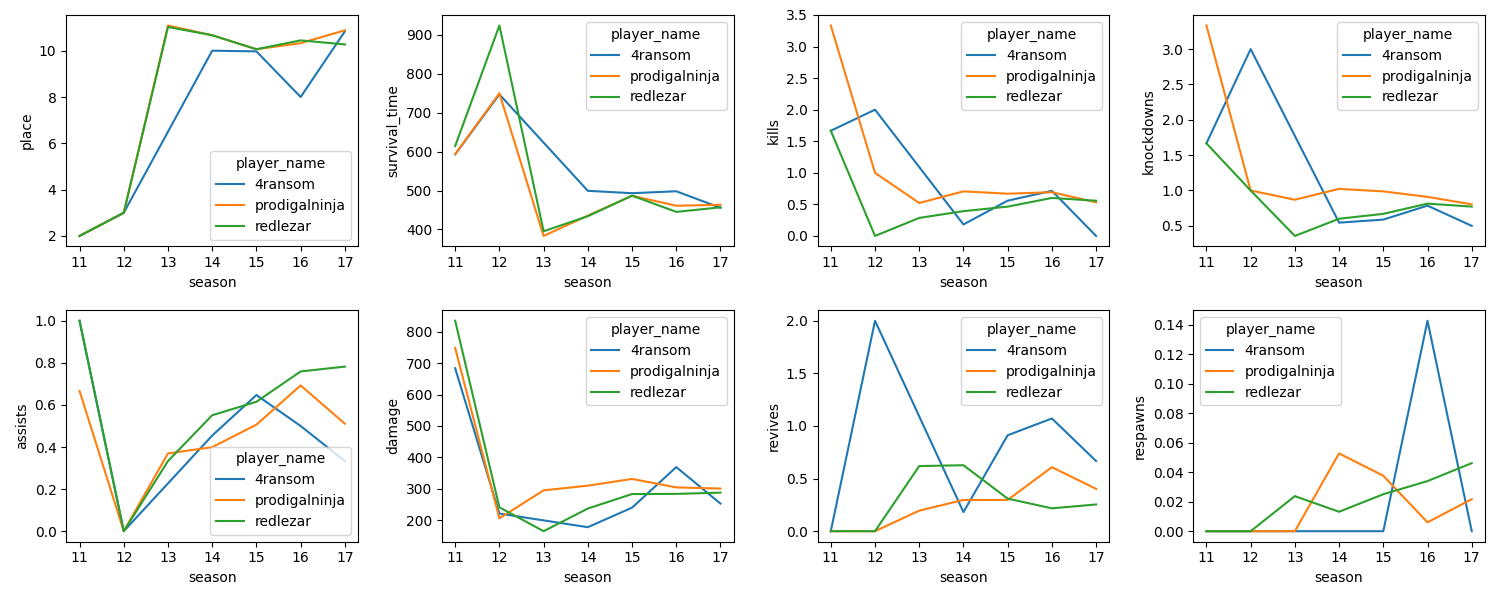

In [31]:
fig, axs = plt.subplots(2, 4, figsize=(15, 6), tight_layout=True)

sns.lineplot(x="season", y="place", hue="player_name", data=season_summary_df, ax=axs[0][0])
sns.lineplot(x="season", y="survival_time", hue="player_name", data=season_summary_df, ax=axs[0][1])
sns.lineplot(x="season", y="kills", hue="player_name", data=season_summary_df, ax=axs[0][2])
sns.lineplot(x="season", y="knockdowns", hue="player_name", data=season_summary_df, ax=axs[0][3])
sns.lineplot(x="season", y="assists", hue="player_name", data=season_summary_df, ax=axs[1][0])
sns.lineplot(x="season", y="damage", hue="player_name", data=season_summary_df, ax=axs[1][1])
sns.lineplot(x="season", y="revives", hue="player_name", data=season_summary_df, ax=axs[1][2])
sns.lineplot(x="season", y="respawns", hue="player_name", data=season_summary_df, ax=axs[1][3])